In [1]:
#importin libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data1 = pd.read_csv(r"C:\Users\anshv\OneDrive\Desktop\Dh\CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv", delimiter='|')

data2 = pd.read_csv(r"C:\Users\anshv\OneDrive\Desktop\Dh\CTU-IoT-Malware-Capture-3-1conn.log.labeled.csv",delimiter='|')

data3 = pd.read_csv(r"C:\Users\anshv\OneDrive\Desktop\Dh\CTU-IoT-Malware-Capture-9-1conn.log.labeled.csv", delimiter='|')

data4 = pd.read_csv(r"C:\Users\anshv\OneDrive\Desktop\Dh\CTU-IoT-Malware-Capture-20-1conn.log.labeled.csv", delimiter='|')

data5 = pd.read_csv(r"C:\Users\anshv\OneDrive\Desktop\Dh\CTU-IoT-Malware-Capture-21-1conn.log.labeled.csv", delimiter='|')

data6 = pd.read_csv(r"C:\Users\anshv\OneDrive\Desktop\Dh\CTU-IoT-Malware-Capture-34-1conn.log.labeled.csv", delimiter='|')

data7 = pd.read_csv(r"C:\Users\anshv\OneDrive\Desktop\Dh\CTU-IoT-Malware-Capture-35-1conn.log.labeled.csv", delimiter='|')

data8 = pd.read_csv(r"C:\Users\anshv\OneDrive\Desktop\Dh\CTU-IoT-Malware-Capture-42-1conn.log.labeled.csv", delimiter='|')
data9 = pd.read_csv(r"C:\Users\anshv\OneDrive\Desktop\Dh\CTU-IoT-Malware-Capture-48-1conn.log.labeled.csv", delimiter='|')
data10 = pd.read_csv(r"C:\Users\anshv\OneDrive\Desktop\Dh\CTU-IoT-Malware-Capture-60-1conn.log.labeled.csv", delimiter='|')
data = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10], ignore_index=True)


C:\Users\anshv\AppData\Local\Temp\ipykernel_18064\3185991322.py:16: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data9 = pd.read_csv(r"C:\Users\anshv\OneDrive\Desktop\Dh\CTU-IoT-Malware-Capture-48-1conn.log.labeled.csv", delimiter='|')


In [3]:
del data1,data2,data3,data4,data5,data6,data7,data8,data9,data10

In [4]:
data.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.525880e+09,CUmrqr4svHuSXJy5z7,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,-,2.999051,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
1,1.525880e+09,CH98aB3s1kJeq6SFOc,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
2,1.525880e+09,C3GBTkINvXNjVGtN5,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
3,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,-,2.998796,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
4,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan


In [5]:
data.shape

(25000363, 23)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000363 entries, 0 to 25000362
Data columns (total 23 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ts              float64
 1   uid             object 
 2   id.orig_h       object 
 3   id.orig_p       float64
 4   id.resp_h       object 
 5   id.resp_p       float64
 6   proto           object 
 7   service         object 
 8   duration        object 
 9   orig_bytes      object 
 10  resp_bytes      object 
 11  conn_state      object 
 12  local_orig      object 
 13  local_resp      object 
 14  missed_bytes    float64
 15  history         object 
 16  orig_pkts       float64
 17  orig_ip_bytes   float64
 18  resp_pkts       float64
 19  resp_ip_bytes   float64
 20  tunnel_parents  object 
 21  label           object 
 22  detailed-label  object 
dtypes: float64(8), object(15)
memory usage: 4.3+ GB


In [7]:
# Calculating the number of missing values in each column
missing_values = data.isnull().sum()
missing_values

ts                      0
uid                     0
id.orig_h               0
id.orig_p               0
id.resp_h               0
id.resp_p               0
proto                   0
service                 0
duration                0
orig_bytes              0
resp_bytes              0
conn_state              0
local_orig              0
local_resp              0
missed_bytes            0
history                 0
orig_pkts               0
orig_ip_bytes           0
resp_pkts               0
resp_ip_bytes           0
tunnel_parents          0
label                   0
detailed-label    9173939
dtype: int64

In [8]:
# Calculating the percentage of missing values in each column
missing_values*100/len(data)

ts                 0.000000
uid                0.000000
id.orig_h          0.000000
id.orig_p          0.000000
id.resp_h          0.000000
id.resp_p          0.000000
proto              0.000000
service            0.000000
duration           0.000000
orig_bytes         0.000000
resp_bytes         0.000000
conn_state         0.000000
local_orig         0.000000
local_resp         0.000000
missed_bytes       0.000000
history            0.000000
orig_pkts          0.000000
orig_ip_bytes      0.000000
resp_pkts          0.000000
resp_ip_bytes      0.000000
tunnel_parents     0.000000
label              0.000000
detailed-label    36.695223
dtype: float64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000363 entries, 0 to 25000362
Data columns (total 23 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ts              float64
 1   uid             object 
 2   id.orig_h       object 
 3   id.orig_p       float64
 4   id.resp_h       object 
 5   id.resp_p       float64
 6   proto           object 
 7   service         object 
 8   duration        object 
 9   orig_bytes      object 
 10  resp_bytes      object 
 11  conn_state      object 
 12  local_orig      object 
 13  local_resp      object 
 14  missed_bytes    float64
 15  history         object 
 16  orig_pkts       float64
 17  orig_ip_bytes   float64
 18  resp_pkts       float64
 19  resp_ip_bytes   float64
 20  tunnel_parents  object 
 21  label           object 
 22  detailed-label  object 
dtypes: float64(8), object(15)
memory usage: 4.3+ GB


In [10]:
colstoreplace = ['uid','id.orig_h','id.resp_h','proto','service','duration','orig_bytes','resp_bytes','conn_state','local_orig','local_resp','history','tunnel_parents','label','detailed-label']


In [11]:
for col in colstoreplace:
  data[col].replace("-",None,inplace=True)
# Calculating the number of missing values in each column
data.isnull().sum()*100/len(data)

ts                  0.000000
uid                 0.000000
id.orig_h           0.000000
id.orig_p           0.000000
id.resp_h           0.000000
id.resp_p           0.000000
proto               0.000000
service            99.928057
duration           61.062341
orig_bytes         61.062341
resp_bytes         61.062341
conn_state          0.000000
local_orig        100.000000
local_resp        100.000000
missed_bytes        0.000000
history             0.100463
orig_pkts           0.000000
orig_ip_bytes       0.000000
resp_pkts           0.000000
resp_ip_bytes       0.000000
tunnel_parents    100.000000
label               0.000000
detailed-label     71.805777
dtype: float64

In [12]:
column_name = 'label'

# Get the value counts
value_counts = data[column_name].value_counts()

# Calculate percentages
percentages = (value_counts / len(data[column_name])) * 100

# Combine values and percentages into a DataFrame
result_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts.values, 'Percentage': percentages.values})

# Print the result
print(result_df)

                                   Value    Count  Percentage
0                                 Benign  8777766   35.110554
1                              Malicious  7046785   28.186731
2                       Malicious   DDoS  5778153   23.112276
3  Malicious   PartOfAHorizontalPortScan  3386241   13.544767
4                        Malicious   C&C     8660    0.034639
5                     Malicious   Attack     2755    0.011020
6               Malicious   FileDownload        3    0.000012


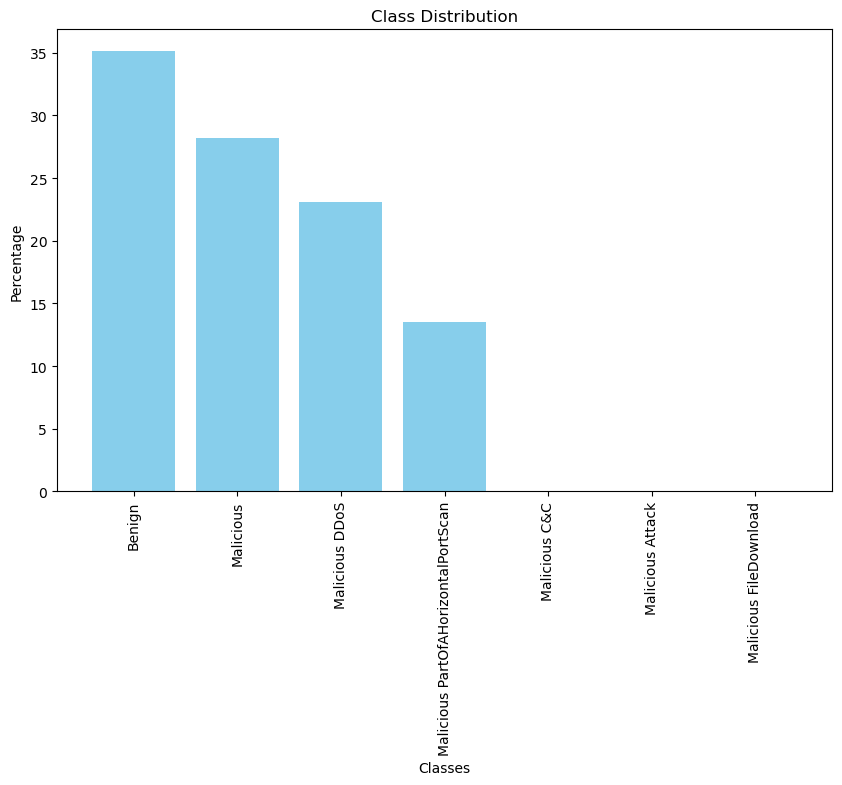

In [13]:
import matplotlib.pyplot as plt

class_distribution = {
    "Benign": 35.11,
    "Malicious": 28.18,
    "Malicious DDoS": 23.11,
    "Malicious PartOfAHorizontalPortScan": 13.54,
    "Malicious C&C": 0.034,
    "Malicious Attack": 0.011,
    "Malicious FileDownload": 0.000012
}

plt.figure(figsize=(10, 6))
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.show()


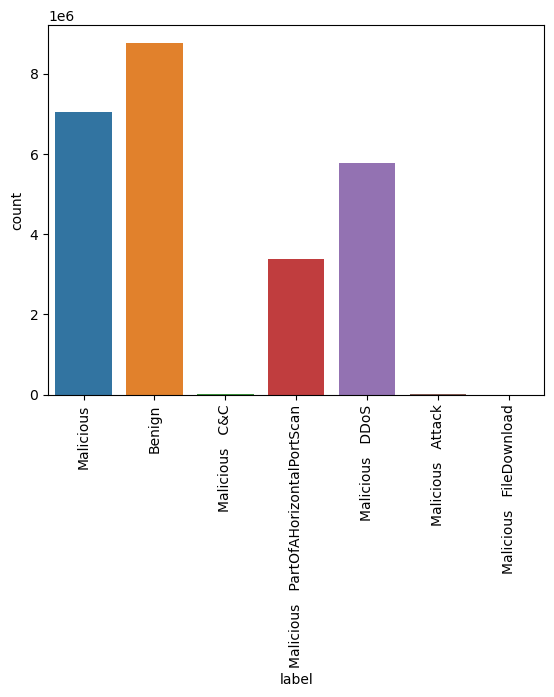

In [14]:
sns.countplot(data=data,x='label')
plt.xticks(rotation=90)
plt.show()

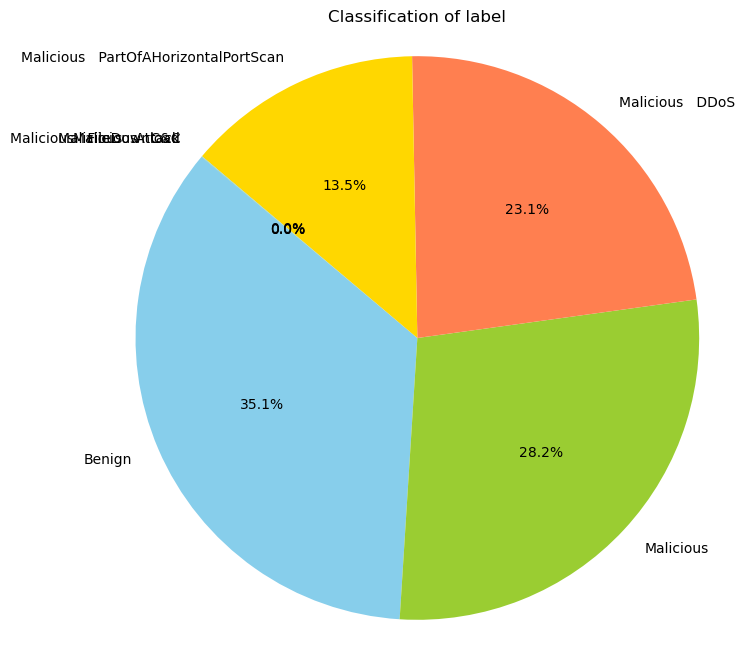

In [15]:
#creating pie chart of classification of 'proto'
classification= data['label'].value_counts()

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(classification, labels=classification.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'yellowgreen', 'coral', 'gold'])
plt.title('Classification of label')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

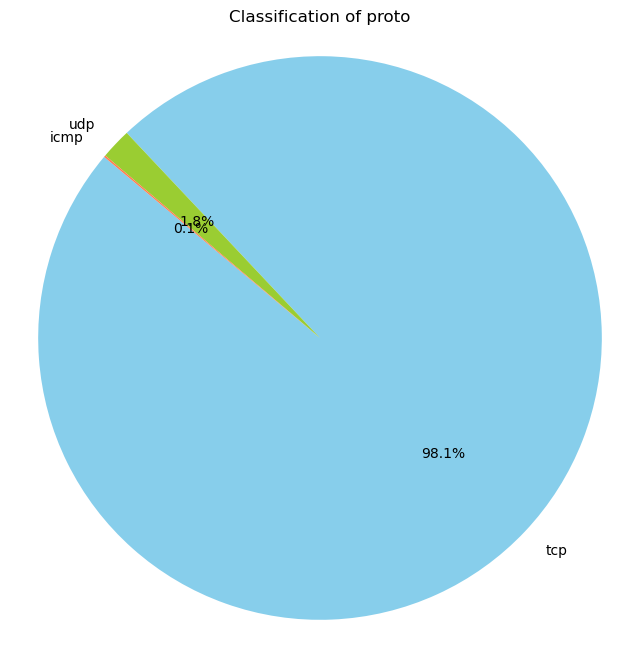

In [16]:
#creating pie chart of classification of 'proto'
classification= data['proto'].value_counts()

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(classification, labels=classification.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'yellowgreen', 'coral', 'gold'])
plt.title('Classification of proto')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


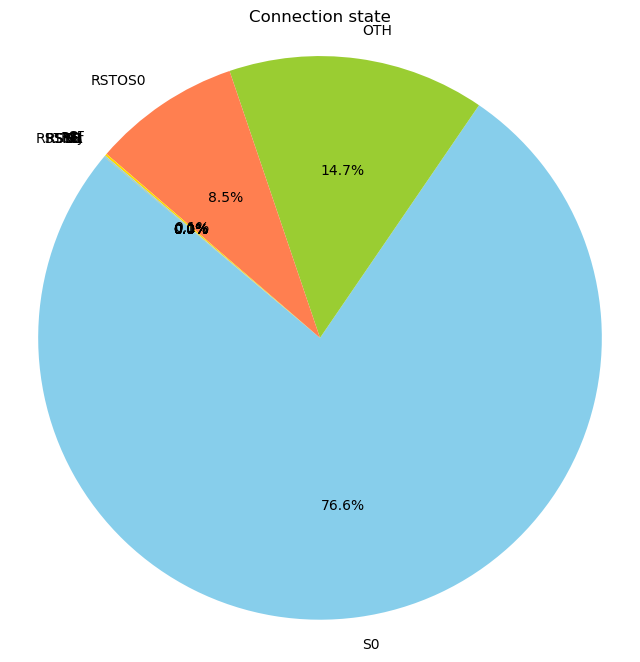

In [17]:
#creating pie chart of classification of 'proto'
classification= data['conn_state'].value_counts()

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(classification, labels=classification.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'yellowgreen', 'coral', 'gold'])
plt.title('Connection state')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


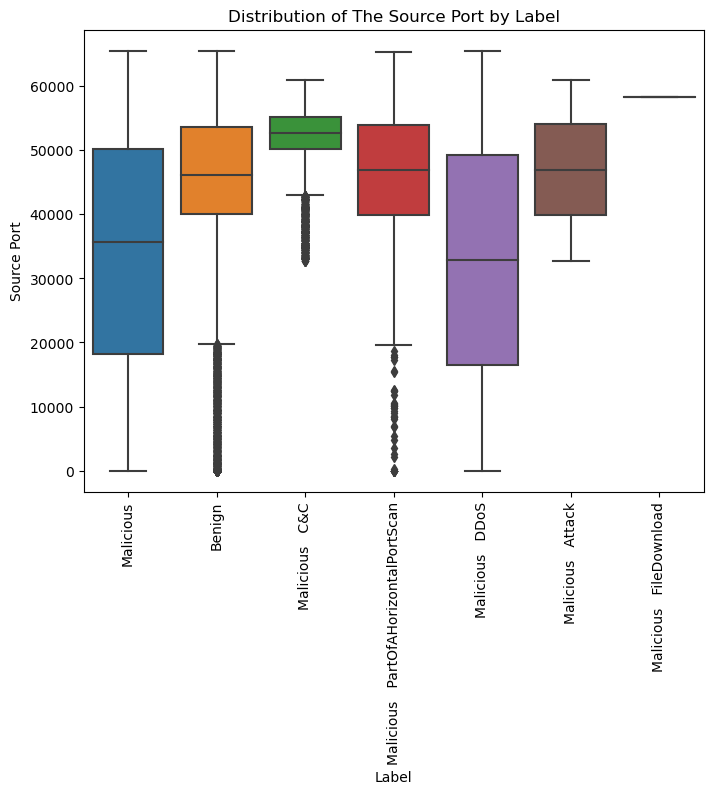

In [18]:
# plotting the box plot of data value with respect to question
#plot depicts that most values lies in midddle and high value which are far away are outliers 
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='label', y='id.orig_p')
plt.xticks(rotation=90)
plt.title('Distribution of The Source Port by Label')
plt.xlabel('Label')
plt.ylabel('Source Port')
plt.show()

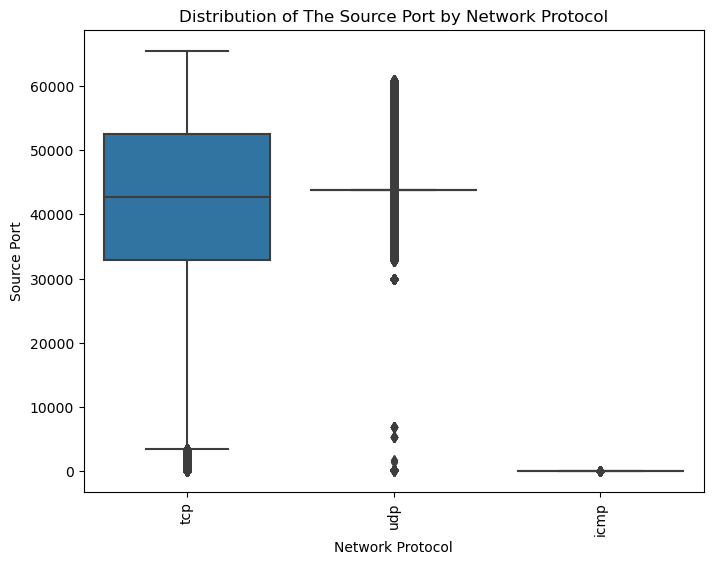

In [19]:
# plotting the box plot of The source port with respect to network protocol
#plot depicts that most values lies in midddle and high value which are far away are outliers 
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='proto', y='id.orig_p')
plt.xticks(rotation=90)
plt.title('Distribution of The Source Port by Network Protocol')
plt.xlabel('Network Protocol')
plt.ylabel('Source Port')
plt.show()

In [20]:
cols_to_label = ['proto','conn_state','history','label']
le = LabelEncoder()
for col in cols_to_label:
    data[col] = le.fit_transform(data[col])

In [21]:
data.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.525880e+09,CUmrqr4svHuSXJy5z7,192.168.100.103,51524.0,65.127.233.163,23.0,1,None,2.999051,0,...,None,0.0,40,3.0,180.0,0.0,0.0,None,1,PartOfAHorizontalPortScan
1,1.525880e+09,CH98aB3s1kJeq6SFOc,192.168.100.103,56305.0,63.150.16.171,23.0,1,None,None,None,...,None,0.0,40,1.0,60.0,0.0,0.0,None,1,PartOfAHorizontalPortScan
2,1.525880e+09,C3GBTkINvXNjVGtN5,192.168.100.103,41101.0,111.40.23.49,23.0,1,None,None,None,...,None,0.0,40,1.0,60.0,0.0,0.0,None,1,PartOfAHorizontalPortScan
3,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,1,None,2.998796,0,...,None,0.0,40,3.0,180.0,0.0,0.0,None,1,PartOfAHorizontalPortScan
4,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,1,None,None,None,...,None,0.0,40,1.0,60.0,0.0,0.0,None,1,PartOfAHorizontalPortScan


In [22]:
data['proto'].unique()

array([1, 2, 0])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000363 entries, 0 to 25000362
Data columns (total 23 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ts              float64
 1   uid             object 
 2   id.orig_h       object 
 3   id.orig_p       float64
 4   id.resp_h       object 
 5   id.resp_p       float64
 6   proto           int32  
 7   service         object 
 8   duration        object 
 9   orig_bytes      object 
 10  resp_bytes      object 
 11  conn_state      int32  
 12  local_orig      object 
 13  local_resp      object 
 14  missed_bytes    float64
 15  history         int32  
 16  orig_pkts       float64
 17  orig_ip_bytes   float64
 18  resp_pkts       float64
 19  resp_ip_bytes   float64
 20  tunnel_parents  object 
 21  label           int32  
 22  detailed-label  object 
dtypes: float64(8), int32(4), object(11)
memory usage: 3.9+ GB


In [24]:
cor = data.corr()

C:\Users\anshv\AppData\Local\Temp\ipykernel_18064\2763113851.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


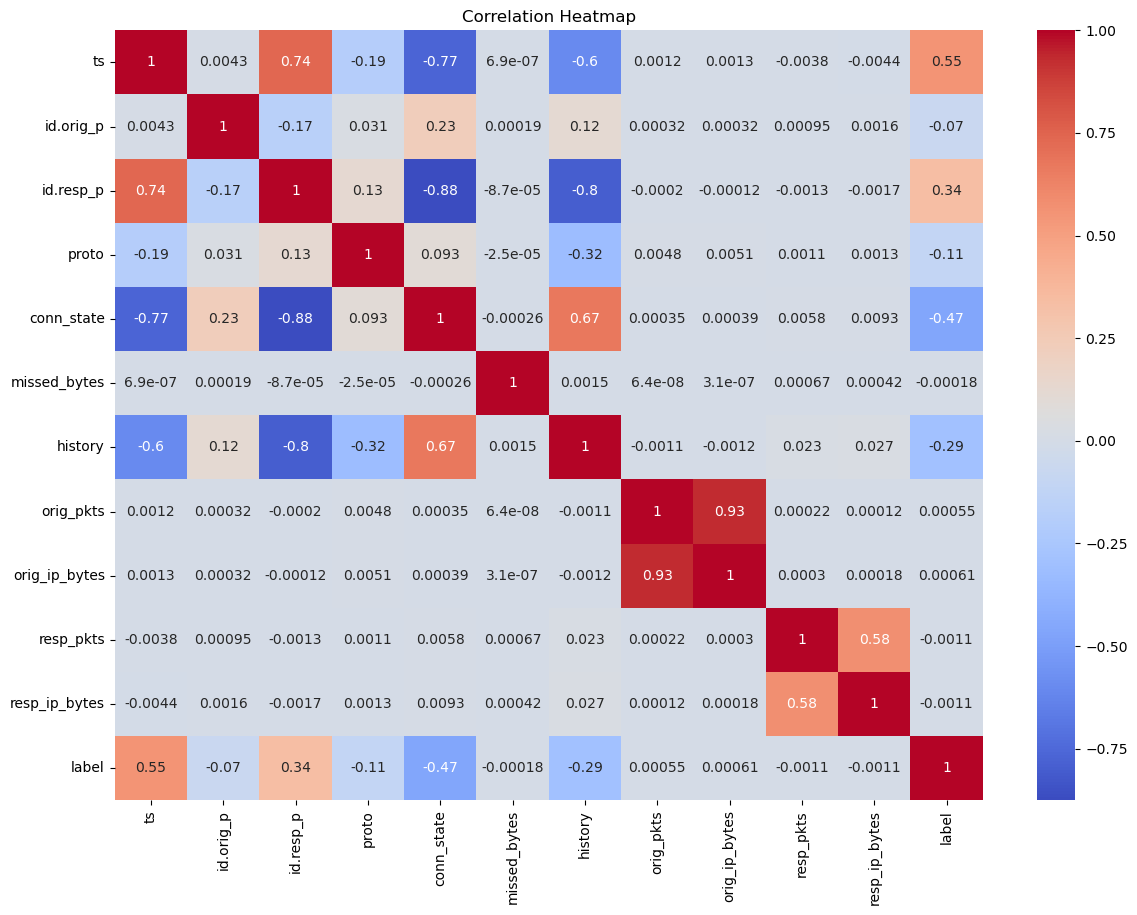

In [25]:
plt.figure(figsize=(14,10))
sns.heatmap(cor, annot = True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [26]:
cols_to_drop = ['service','duration','orig_bytes','resp_bytes','local_orig','local_resp','tunnel_parents','detailed-label','uid','id.orig_h','id.resp_h','missed_bytes','orig_pkts','orig_ip_bytes','resp_pkts','resp_ip_bytes']
data.drop(columns=cols_to_drop, inplace = True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000363 entries, 0 to 25000362
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ts          float64
 1   id.orig_p   float64
 2   id.resp_p   float64
 3   proto       int32  
 4   conn_state  int32  
 5   history     int32  
 6   label       int32  
dtypes: float64(3), int32(4)
memory usage: 953.7 MB


In [28]:
data.shape

(25000363, 7)